# Homework 8: Coding

**Due Tuesday December 9th, 11:59pm.**

**This is a group assignment.**

**Submit hw8.ipynb link to Gradescope.**

# Question 2: Autoencoders 

In this question, we will try fitting the [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) to a vanilla, fully connected autoencoder. You won't have to experiment with the architecture, as the architecture is already given in the PDF of the homework. Please use Google Colab to run this section to maintain consistency across the class. 

Refer to [Pytorch tutorials](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) if you need a refresher on PyTorch.

*Tip: To speed up model training, be sure to go to:"Runtime->Change runtime type->Hardware accelerator: GPU" to use a GPU*

In [ ]:
# !pip install tqdm # you might need to install tqdm at first 

In [ ]:
import os
import torch
import torchvision
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import FashionMNIST
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from tqdm import tqdm

In [ ]:
# Seed set for reproducibility. Do not change this.
torch.manual_seed(15)

## 2.1 Constructing the Autoencoder

This section is where you are supposed to code up the architecture and train a simple autoencoder. Helper functions are provided for you.

### Helper Functions to Visualize Images 


In [ ]:
def convert_to_img(x):
    '''
    Converts the output of the autoencoder network to a batch of images that can be viewed. 
    Essentially reverses the transformation applied to the input dataset. 

    Args:
        x: Output layer of the autoencoder, with the batch size
    Returns:
        x: Viewable image, reshaped to be an array of images.

    '''
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    x = x.view(x.size(0), 1, 28, 28)
    return x

# Making a Grid to print images on screen  
  
def imshow(img,epoch):
    '''
    Converts a torchvision grid to be viewable on matplotlib. 

    Args:
        img: of the type Torchvision.utils.grid(img). 
        epoch: the epoch that this image was recorded on 
    Returns:
        Returns nothing. Plots the Grid.
    '''
    npimg = img.numpy()
    
    figure(num=None, figsize=(8, 6), dpi=150, edgecolor='k')
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title("Reconstruction of last minibatch of epoch "+str(epoch))
    
def data_to_model(img):
    '''
    Takes in the image batch given by the dataloader and returns batch that can be fed into the model
    
    Args:
        img: Image batch obtained from the dataloader iterator 
    Returns:
        img: Image batch that can be fed into the model
    '''
    img = img.view(img.size(0), -1)
    img = Variable(img).cuda()
    
    return img 


### Data pre-processing and Dataloader generation
The given helper code below applies a pre-processing transformation and also generates the iterator through which the data will be sampled from.

In [ ]:
# Image transform, normalization 
mean = 0.5 #TODO: Enter value of mean to be used
std = 0.5 #TODO: Enter value of std to be used
# dtype = torch.type('float32')
# device =  torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# mean = torch.as_tensor(mean, dtype=torch.float, device=device)
# std = torch.as_tensor(std, dtype=torch.float, device=device)

img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((mean,), (std,))
])

In [ ]:
#Dataset Generation

batch_size = 128 #TODO: Enter a suitable batch size.

dataset = full_data = FashionMNIST('./data',download=True, transform=img_transform) # Loading the dataset 

dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True) # Dataset that is mainly used for training

full_dataload = iter(DataLoader(full_data,batch_size=len(full_data),shuffle=False)) # Dataset object to get the full dataset returned when iterated.
                                                                                    # This will be used to calculate the reconstruction errors, and to plot latent spaces. 
full_imgs, full_label = full_dataload.next()

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
'''
This is the autoencoder class where you are supposed to set up the architecture, and the forward pass.
The constructor is setup so that it takes in a variable 
'''

class autoencoder(nn.Module):
    def __init__(self, n=2):
        super(autoencoder, self).__init__()
        '''
        The __init__ takes in 'n' which denotes the size of the bottleneck layer. 
        '''
        ### TODO: Implement the architecture with an encoder layer and a decoder layer 
        #         as defined in the problem set PDF. Be sure to use bias terms here.
        #
        
        #### Start your code here ####
        self.encoder = nn.Sequential(
            nn.Linear(in_features=28*28, out_features=256),
            nn.ReLU(),
            nn.Linear(in_features=256, out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=n),
            nn.ReLU(),
        ) # TODO: fill the architecture
        self.decoder = nn.Sequential(
            nn.Linear(in_features=n, out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=256),
            nn.ReLU(),
            nn.Linear(in_features=256, out_features=28*28),
        ) # TODO: fill the architecture
        self.tanh = nn.Tanh()

        #### End your code here 
    def forward(self, x):
        ### TODO: Implement the forward pass, by taking in the input batch of images x, and returning 
        #         the output of the network 
        ### Start your code here ###
        code = self.encoder(x)
        x = self.decoder(code)
        x = self.tanh(x)
        # x = self.category_from_output(x)
        ### End your code here ###
        return x
    def latent_space(self,x):
        enc = self.encoder(x)
        return enc
# model = autoencoder()
# # model = AE(input_shape=784)
# device = torch.device('cuda')
# model = model.to(device)
# criterion = nn.MSELoss() #TODO
# learning_rate=0.001
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# for data in dataloader:
#   img, label = data
#   img = data_to_model(img)
#   img,label = img.to(device),label.to(device)
#   print(label.shape)
#   model.zero_grad()
#   optimizer.zero_grad()

#   output = model(img)
#   print('output.shape',output.shape)
#   print(label.shape)
#   print(output)
#   loss = criterion(output,img)
#   loss.backward()
#   optimizer.step()
#   print(loss)
#   break

In [ ]:
'''
You will implement the main training loop here 

'''

def train(num_epochs, dataloader, model, criterion, optimizer):
    '''
    Takes in all necessary parameters to train the model and returns the model and the loss curves.

    Args:
      num_epochs: Number of epochs to train for 
      dataloader: The training dataloader object that was given in the helper code 
      model: The autoencoder model from the class
      criterion: Loss criterion
      Optimizer: Optimizer to be used 
    Returns:
      model: trained model 
      loss_curve: A list of mean epoch losses over the range of epochs
    '''

    #### TODO: In this function, you'll implement the main training loop. 
    device = torch.device('cuda')
    model = model.to(device)

    loss_curve = []
    for epoch in tqdm(range(num_epochs)):
        epoch_loss = 0
        for data in dataloader:
            img, label = data
            
            #### TODO: Implement the forward pass, the loss calculation, and the optimization processes.
            #          The helper function data_to_model will be useful here.
            #          Calculate the losses and add them to the total epoch loss to find the mean epoch loss 
            #### Start your Code Here 
            img = data_to_model(img)
            img, label = img.to(device), label.to(device)
            model.zero_grad()
            optimizer.zero_grad()

            output = model(img)
            loss = criterion(output,img)
            loss.backward()
            optimizer.step()

            epoch_loss+=loss
            
            #### End your code Here

        epoch_loss = epoch_loss / len(dataloader)
        loss_curve.append(epoch_loss)
        # break
        print(f' mean epoch loss: {epoch_loss:.4f}')

        if epoch % 10 == 0: 
            # For every 10 epochs, take the output of the last minibatch of the epoch and print the reconstruction.
            pic = convert_to_img(output.cpu().data)
            imshow(torchvision.utils.make_grid(pic),epoch)

    return model, loss_curve 


### Main code for Question 2.1
Answer question 2.1 by running this main code. You are asked to plot the training curve of the autoencoder, with **bottleneck layer size being 2**. You are also asked to plot the reconstructions of the autoencoder while it is training at epochs 0, 10, and 20. The optimizer we will use is `torch.optim.Adam()` and the criterion we will use is `nn.MSELoss()`.

The code to train the model

-------TRAINING WITH HIDDEN LAYER SIZE 2 ------ 


  4%|▍         | 1/25 [00:16<06:41, 16.72s/it]

 mean epoch loss: 0.1807


  8%|▊         | 2/25 [00:33<06:21, 16.57s/it]

 mean epoch loss: 0.1250


 12%|█▏        | 3/25 [00:49<06:05, 16.60s/it]

 mean epoch loss: 0.1177


 16%|█▌        | 4/25 [01:06<05:47, 16.55s/it]

 mean epoch loss: 0.1147


 20%|██        | 5/25 [01:22<05:31, 16.59s/it]

 mean epoch loss: 0.1128


 24%|██▍       | 6/25 [01:39<05:15, 16.63s/it]

 mean epoch loss: 0.1112


 28%|██▊       | 7/25 [01:56<04:59, 16.64s/it]

 mean epoch loss: 0.1102


 32%|███▏      | 8/25 [02:12<04:42, 16.62s/it]

 mean epoch loss: 0.1090


 36%|███▌      | 9/25 [02:29<04:25, 16.59s/it]

 mean epoch loss: 0.1081


 40%|████      | 10/25 [02:45<04:08, 16.58s/it]

 mean epoch loss: 0.1076


 44%|████▍     | 11/25 [03:02<03:51, 16.55s/it]

 mean epoch loss: 0.1066


 48%|████▊     | 12/25 [03:19<03:35, 16.55s/it]

 mean epoch loss: 0.1061


 52%|█████▏    | 13/25 [03:35<03:18, 16.54s/it]

 mean epoch loss: 0.1051


 56%|█████▌    | 14/25 [03:52<03:01, 16.53s/it]

 mean epoch loss: 0.1047


 60%|██████    | 15/25 [04:08<02:45, 16.54s/it]

 mean epoch loss: 0.1042


 64%|██████▍   | 16/25 [04:25<02:28, 16.53s/it]

 mean epoch loss: 0.1036


 68%|██████▊   | 17/25 [04:41<02:12, 16.61s/it]

 mean epoch loss: 0.1029


 72%|███████▏  | 18/25 [04:58<01:56, 16.65s/it]

 mean epoch loss: 0.1024


 76%|███████▌  | 19/25 [05:15<01:39, 16.60s/it]

 mean epoch loss: 0.1021


 80%|████████  | 20/25 [05:31<01:23, 16.66s/it]

 mean epoch loss: 0.1015


 84%|████████▍ | 21/25 [05:48<01:06, 16.65s/it]

 mean epoch loss: 0.1012


 88%|████████▊ | 22/25 [06:05<00:49, 16.61s/it]

 mean epoch loss: 0.1009


 92%|█████████▏| 23/25 [06:21<00:33, 16.67s/it]

 mean epoch loss: 0.1005


 96%|█████████▌| 24/25 [06:38<00:16, 16.62s/it]

 mean epoch loss: 0.1003


100%|██████████| 25/25 [06:54<00:00, 16.59s/it]

 mean epoch loss: 0.1003


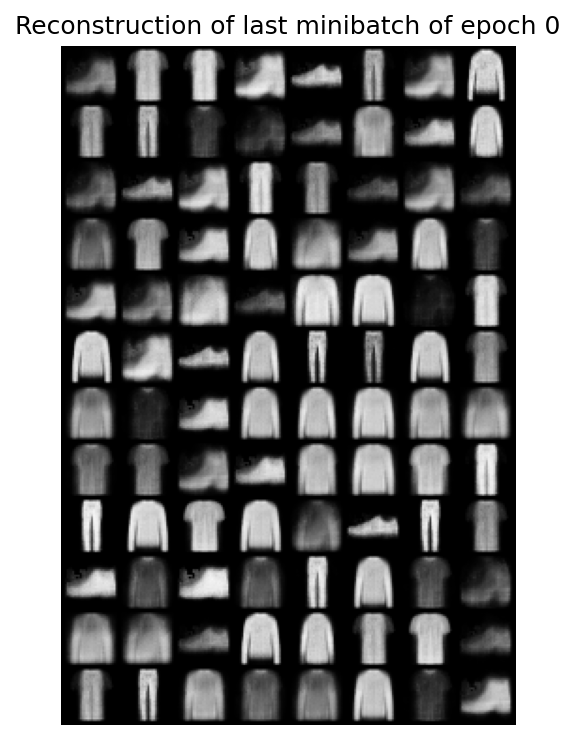

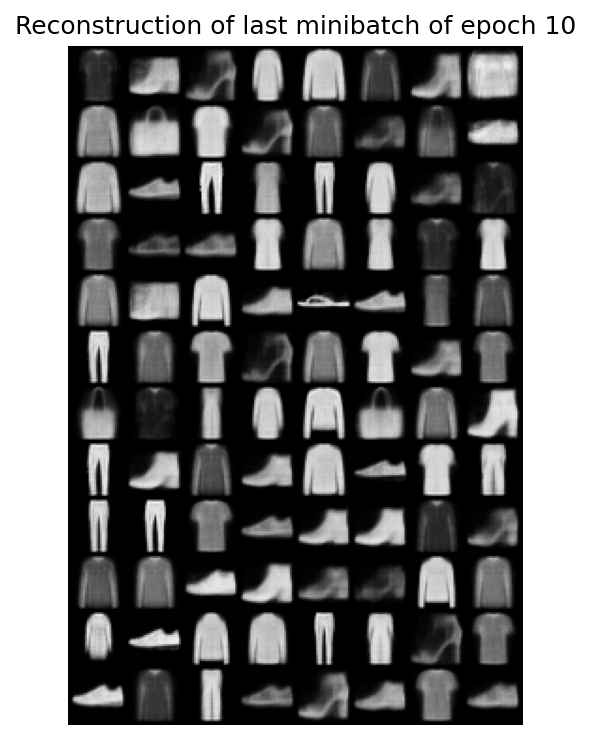

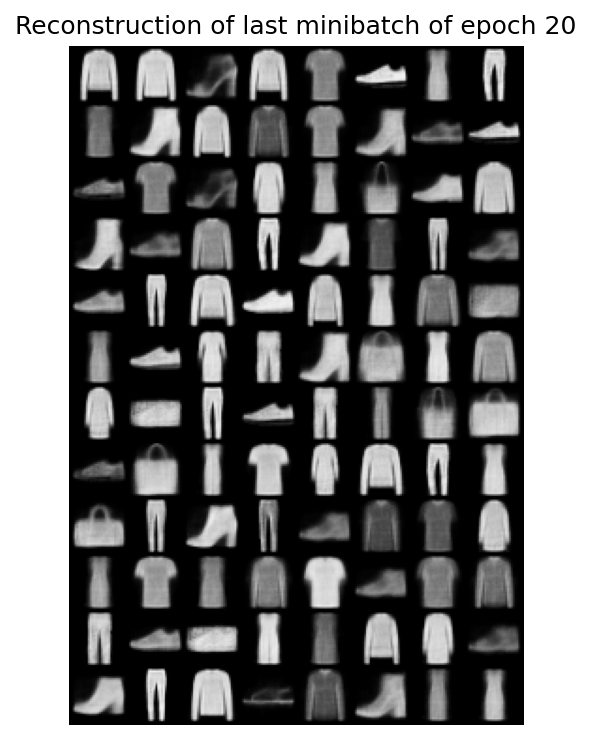

In [ ]:

num_epochs = 25 # Run 25 epoches
learning_rate = 1e-3 #TODO: Give in a suitable learning rate for the optimizer. 

print('-------TRAINING WITH HIDDEN LAYER SIZE 2 ------ ')

#TODO: Create a model object of the autoencoder class with bottleneck layer size (n) being 2. 
#      Define the criterion and the optimizer. Call the train function. 

model = autoencoder() #TODO
criterion = nn.MSELoss() #TODO
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  #TODO

trained_model, loss_curve = train(num_epochs, dataloader, model, criterion, optimizer) #TODO


In [ ]:
# torch.save(model.state_dict(), '/content/520hw8.pth')
model_path = '/content/520hw8.pth'
model = autoencoder()
device = torch.device('cuda')
model = model.to(device)
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

The code for plotting the training curve is given below to you.

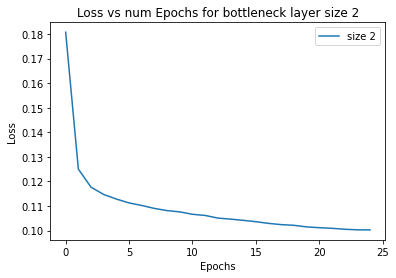

In [ ]:
epochs = np.arange(num_epochs)
plt.figure()
plt.plot(epochs,loss_curve,label='size 2')
plt.title("Loss vs num Epochs for bottleneck layer size 2")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss") 
plt.show()

### Latex question 2.1:
Please  report  the  reconstructed  images  from  Epoch  0,  Epoch  10  and  Epoch  20.   These  reconstruc-tions are the output of your autoencoder for the last minibatch of the epoch.  Record these outputs for0, 10, 20 Epochs respectively.  Also report the training curve of the autoencoder (mean epoch loss vsepochs).

## 2.2 Latent Space Decomposition

In this section, you are asked to plot the latent space of the encoded inputs of the model that was trained above in 3.1. You are asked to plot the encoding of the full image set corresponding to the classes 0 and 7. Use the `full_imgs` image batch that was given as a part of the Dataloader helper code. 

In [ ]:
##### TODO: 
#           Pass the extacted image batches for class labels 5, 7 and 8 
#           (img_5, img_7, img_8) into trained_model trained in Section 3.1, 
#           and extract the *encoding* only (ie. the output of the forward layer). 
#           You will want to use the data_to_model helper function defined above.
#           At the end, have your encoding for classes 5, 7 and 8 as 
#           'enc_5', 'enc_7' and 'enc_8'
#           Hint: To read out a Variable var, use var.detach().cpu().numpy()
device = torch.device('cuda')
img_5 = full_imgs[full_label==5]
img_7 = full_imgs[full_label==7]
img_8 = full_imgs[full_label==8]

### Start your code here ###
img_5,img_7,img_8 = data_to_model(img_5),data_to_model(img_7),data_to_model(img_8)
img_5,img_7,img_8 = img_5.to(device), img_7.to(device), img_8.to(device)

enc_5 = model.latent_space(img_5).detach().cpu().numpy() # TODO: Find this
enc_7 = model.latent_space(img_7).detach().cpu().numpy() # TODO: Find this
enc_8 = model.latent_space(img_8).detach().cpu().numpy() # TODO: Find this

### End your code here ###

The plotting code for plotting the encoding of the classes 5, 7 and 8 is given below to you. Use this to generate the plot. 

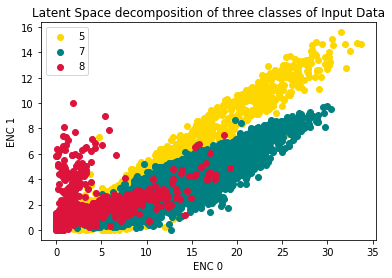

In [ ]:
## DON'T change the color since the color consistency is convenient for grading.
'''
Plotting latent space of encoding of model
'''
plt.figure()
plt.scatter(enc_5[:,0], enc_5[:,1], color='gold', label='5')
plt.scatter(enc_7[:,0], enc_7[:,1], color='teal', label='7')
plt.scatter(enc_8[:,0], enc_8[:,1], color='crimson', label='8')
plt.legend()
plt.xlabel('ENC 0')
plt.ylabel('ENC 1')
plt.title("Latent Space decomposition of three classes of Input Data")
plt.show()

### Latex question 2.2:
1) You will now plot the latent space of this autoencoder, which is essentially the encoding that is obtained for any given input. In this problem, the latent space is the output of the ReLU 3, after  the  Fully  connected  layer  3.   Use  your  learned  model  from  the  previous  section,  and  plot  theimages with the class label ‘5’, ‘7’, and ‘8’ in the 2D latent space.

2) Based on the previous image, demonstrate both the difference and similarity among thepatterns of label ‘5’, ‘7’ and ‘8’ in the latent space decomposition plot.  How are they different and/orsimilar?  And Why?  Recall the dataset label are:  T-shirt/top 0, Trouser 1, Pullover 2, Dress 3, Coat4, Sandal 5, Shirt 6, Sneaker 7, Bag 8, and Ankle boot 9.

3) From the latent space plot, explain what the encoding has done to the inputs. How is this effect related to what PCA does? Why is this useful? 

## 2.3 Reconstruction error vs Bottleneck Layer:

In this section, you build on top of the code you wrote in section 2.1. Here, we vary the size of the bottleneck layer to see how that affects the reconstructions. Here, we will only observe the reconstruction error corresponding to the entire image set of class 0.

### Reconstruction Error
Fill in the function below that takes in the model and the image batch from the dataloader and computes the reconstruction error (`nn.MSELoss`).

In [ ]:
#### TODO: Fill in the method below that takes in the model and the image batch from the dataloader
#          and returns the reconstruction error. The helper function data_to_model will be useful.
#          Hint: To read out a Variable var, use var.detach().cpu().numpy()
 
def reconstruction_error(model,img):
    '''
    Args:
      model: Input model 
      img: Image batch from the dataloader

    Returns:
      err: Reconstruction Error, a scalar quantity.
    '''
    err = 0
    ##### Start your code here #####
    criterion = nn.MSELoss()
    img = data_to_model(img)
    img= img.to(device)
    output = model(img)
    err = criterion(output,img)

    #### End your code ###

    return err

  

### Main code for 2.3

Run this main code to generate the plots required to answer question 2.3. Use the full_imgs image batch defined above to generate the reconstruction image batch, which is essentially the images belonging to class '5'.

  0%|          | 0/5 [00:00<?, ?it/s]


-------TRAINING WITH HIDDEN LAYER SIZE 4------ 



  5%|▍         | 1/21 [00:16<05:35, 16.79s/it]

 mean epoch loss: 0.1465



 10%|▉         | 2/21 [00:33<05:17, 16.71s/it]

 mean epoch loss: 0.0918



 14%|█▍        | 3/21 [00:50<05:00, 16.72s/it]

 mean epoch loss: 0.0859



 19%|█▉        | 4/21 [01:06<04:43, 16.66s/it]

 mean epoch loss: 0.0825



 24%|██▍       | 5/21 [01:23<04:25, 16.61s/it]

 mean epoch loss: 0.0805



 29%|██▊       | 6/21 [01:39<04:09, 16.61s/it]

 mean epoch loss: 0.0792



 33%|███▎      | 7/21 [01:56<03:51, 16.57s/it]

 mean epoch loss: 0.0780



 38%|███▊      | 8/21 [02:12<03:35, 16.56s/it]

 mean epoch loss: 0.0772



 43%|████▎     | 9/21 [02:29<03:18, 16.56s/it]

 mean epoch loss: 0.0764



 48%|████▊     | 10/21 [02:45<03:01, 16.53s/it]

 mean epoch loss: 0.0758



 52%|█████▏    | 11/21 [03:02<02:46, 16.61s/it]

 mean epoch loss: 0.0752



 57%|█████▋    | 12/21 [03:19<02:29, 16.58s/it]

 mean epoch loss: 0.0748



 62%|██████▏   | 13/21 [03:35<02:12, 16.57s/it]

 mean epoch loss: 0.0743



 67%|██████▋   | 14/21 [03:52<01:55, 16.57s/it]

 mean epoch loss: 0.0739



 71%|███████▏  | 15/21 [04:08<01:39, 16.59s/it]

 mean epoch loss: 0.0735



 76%|███████▌  | 16/21 [04:25<01:23, 16.65s/it]

 mean epoch loss: 0.0732



 81%|████████  | 17/21 [04:42<01:06, 16.62s/it]

 mean epoch loss: 0.0729



 86%|████████▌ | 18/21 [04:59<00:49, 16.65s/it]

 mean epoch loss: 0.0726



 90%|█████████ | 19/21 [05:15<00:33, 16.72s/it]

 mean epoch loss: 0.0723



 95%|█████████▌| 20/21 [05:32<00:16, 16.64s/it]

 mean epoch loss: 0.0721



 20%|██        | 1/5 [05:49<23:16, 349.03s/it]

 mean epoch loss: 0.0717

-------TRAINING WITH HIDDEN LAYER SIZE 8------ 



  5%|▍         | 1/21 [00:17<05:40, 17.04s/it]

 mean epoch loss: 0.1242



 10%|▉         | 2/21 [00:33<05:20, 16.86s/it]

 mean epoch loss: 0.0797



 14%|█▍        | 3/21 [00:50<05:01, 16.77s/it]

 mean epoch loss: 0.0741



 19%|█▉        | 4/21 [01:07<04:43, 16.70s/it]

 mean epoch loss: 0.0711



 24%|██▍       | 5/21 [01:23<04:26, 16.68s/it]

 mean epoch loss: 0.0691



 29%|██▊       | 6/21 [01:40<04:09, 16.63s/it]

 mean epoch loss: 0.0675



 33%|███▎      | 7/21 [01:56<03:52, 16.59s/it]

 mean epoch loss: 0.0663



 38%|███▊      | 8/21 [02:13<03:36, 16.67s/it]

 mean epoch loss: 0.0653



 43%|████▎     | 9/21 [02:30<03:19, 16.61s/it]

 mean epoch loss: 0.0644



 48%|████▊     | 10/21 [02:46<03:03, 16.65s/it]

 mean epoch loss: 0.0637



 52%|█████▏    | 11/21 [03:03<02:46, 16.67s/it]

 mean epoch loss: 0.0631



 57%|█████▋    | 12/21 [03:20<02:29, 16.64s/it]

 mean epoch loss: 0.0626



 62%|██████▏   | 13/21 [03:36<02:12, 16.62s/it]

 mean epoch loss: 0.0621



 67%|██████▋   | 14/21 [03:53<01:56, 16.58s/it]

 mean epoch loss: 0.0617



 71%|███████▏  | 15/21 [04:09<01:39, 16.53s/it]

 mean epoch loss: 0.0613



 76%|███████▌  | 16/21 [04:25<01:22, 16.49s/it]

 mean epoch loss: 0.0610



 81%|████████  | 17/21 [04:42<01:06, 16.51s/it]

 mean epoch loss: 0.0606



 86%|████████▌ | 18/21 [04:58<00:49, 16.51s/it]

 mean epoch loss: 0.0604



 90%|█████████ | 19/21 [05:15<00:33, 16.53s/it]

 mean epoch loss: 0.0601



 95%|█████████▌| 20/21 [05:31<00:16, 16.48s/it]

 mean epoch loss: 0.0598



 40%|████      | 2/5 [11:37<17:26, 348.70s/it]

 mean epoch loss: 0.0596

-------TRAINING WITH HIDDEN LAYER SIZE 16------ 



  5%|▍         | 1/21 [00:16<05:29, 16.49s/it]

 mean epoch loss: 0.1197



 10%|▉         | 2/21 [00:32<05:12, 16.45s/it]

 mean epoch loss: 0.0709



 14%|█▍        | 3/21 [00:49<04:55, 16.41s/it]

 mean epoch loss: 0.0631



 19%|█▉        | 4/21 [01:05<04:37, 16.35s/it]

 mean epoch loss: 0.0588



 24%|██▍       | 5/21 [01:21<04:19, 16.22s/it]

 mean epoch loss: 0.0561



 29%|██▊       | 6/21 [01:37<04:04, 16.27s/it]

 mean epoch loss: 0.0540



 33%|███▎      | 7/21 [01:54<03:47, 16.27s/it]

 mean epoch loss: 0.0526



 38%|███▊      | 8/21 [02:10<03:32, 16.35s/it]

 mean epoch loss: 0.0514



 43%|████▎     | 9/21 [02:27<03:16, 16.42s/it]

 mean epoch loss: 0.0505



 48%|████▊     | 10/21 [02:43<03:00, 16.39s/it]

 mean epoch loss: 0.0498



 52%|█████▏    | 11/21 [02:59<02:43, 16.32s/it]

 mean epoch loss: 0.0492



 57%|█████▋    | 12/21 [03:16<02:27, 16.34s/it]

 mean epoch loss: 0.0486



 62%|██████▏   | 13/21 [03:32<02:11, 16.39s/it]

 mean epoch loss: 0.0481



 67%|██████▋   | 14/21 [03:49<01:54, 16.41s/it]

 mean epoch loss: 0.0478



 71%|███████▏  | 15/21 [04:05<01:38, 16.39s/it]

 mean epoch loss: 0.0474



 76%|███████▌  | 16/21 [04:21<01:21, 16.39s/it]

 mean epoch loss: 0.0471



 81%|████████  | 17/21 [04:38<01:05, 16.41s/it]

 mean epoch loss: 0.0468



 86%|████████▌ | 18/21 [04:54<00:49, 16.41s/it]

 mean epoch loss: 0.0464



 90%|█████████ | 19/21 [05:11<00:32, 16.46s/it]

 mean epoch loss: 0.0462



 95%|█████████▌| 20/21 [05:27<00:16, 16.52s/it]

 mean epoch loss: 0.0460



 60%|██████    | 3/5 [17:21<11:33, 346.77s/it]

 mean epoch loss: 0.0458

-------TRAINING WITH HIDDEN LAYER SIZE 32------ 



  5%|▍         | 1/21 [00:16<05:29, 16.49s/it]

 mean epoch loss: 0.1243



 10%|▉         | 2/21 [00:33<05:14, 16.53s/it]

 mean epoch loss: 0.0687



 14%|█▍        | 3/21 [00:49<04:54, 16.38s/it]

 mean epoch loss: 0.0604



 19%|█▉        | 4/21 [01:05<04:38, 16.41s/it]

 mean epoch loss: 0.0555



 24%|██▍       | 5/21 [01:22<04:23, 16.46s/it]

 mean epoch loss: 0.0522



 29%|██▊       | 6/21 [01:38<04:07, 16.47s/it]

 mean epoch loss: 0.0498



 33%|███▎      | 7/21 [01:55<03:51, 16.50s/it]

 mean epoch loss: 0.0481



 38%|███▊      | 8/21 [02:11<03:33, 16.44s/it]

 mean epoch loss: 0.0467



 43%|████▎     | 9/21 [02:27<03:16, 16.42s/it]

 mean epoch loss: 0.0457



 48%|████▊     | 10/21 [02:44<03:01, 16.51s/it]

 mean epoch loss: 0.0448



 52%|█████▏    | 11/21 [03:01<02:45, 16.51s/it]

 mean epoch loss: 0.0440



 57%|█████▋    | 12/21 [03:17<02:28, 16.50s/it]

 mean epoch loss: 0.0434



 62%|██████▏   | 13/21 [03:34<02:11, 16.45s/it]

 mean epoch loss: 0.0428



 67%|██████▋   | 14/21 [03:50<01:54, 16.42s/it]

 mean epoch loss: 0.0422



 71%|███████▏  | 15/21 [04:06<01:38, 16.39s/it]

 mean epoch loss: 0.0417



 76%|███████▌  | 16/21 [04:23<01:21, 16.38s/it]

 mean epoch loss: 0.0412



 81%|████████  | 17/21 [04:39<01:05, 16.43s/it]

 mean epoch loss: 0.0408



 86%|████████▌ | 18/21 [04:56<00:49, 16.45s/it]

 mean epoch loss: 0.0405



 90%|█████████ | 19/21 [05:12<00:32, 16.45s/it]

 mean epoch loss: 0.0401



 95%|█████████▌| 20/21 [05:28<00:16, 16.43s/it]

 mean epoch loss: 0.0399



 80%|████████  | 4/5 [23:07<05:46, 346.33s/it]

 mean epoch loss: 0.0396

-------TRAINING WITH HIDDEN LAYER SIZE 64------ 



  5%|▍         | 1/21 [00:16<05:36, 16.84s/it]

 mean epoch loss: 0.1203



 10%|▉         | 2/21 [00:33<05:17, 16.69s/it]

 mean epoch loss: 0.0667



 14%|█▍        | 3/21 [00:49<04:58, 16.57s/it]

 mean epoch loss: 0.0583



 19%|█▉        | 4/21 [01:06<04:42, 16.60s/it]

 mean epoch loss: 0.0533



 24%|██▍       | 5/21 [01:23<04:25, 16.57s/it]

 mean epoch loss: 0.0498



 29%|██▊       | 6/21 [01:39<04:07, 16.48s/it]

 mean epoch loss: 0.0472



 33%|███▎      | 7/21 [01:55<03:49, 16.40s/it]

 mean epoch loss: 0.0453



 38%|███▊      | 8/21 [02:11<03:33, 16.41s/it]

 mean epoch loss: 0.0437



 43%|████▎     | 9/21 [02:28<03:16, 16.39s/it]

 mean epoch loss: 0.0424



 48%|████▊     | 10/21 [02:44<03:00, 16.43s/it]

 mean epoch loss: 0.0413



 52%|█████▏    | 11/21 [03:01<02:43, 16.38s/it]

 mean epoch loss: 0.0404



 57%|█████▋    | 12/21 [03:17<02:26, 16.33s/it]

 mean epoch loss: 0.0395



 62%|██████▏   | 13/21 [03:33<02:10, 16.30s/it]

 mean epoch loss: 0.0389



 67%|██████▋   | 14/21 [03:49<01:53, 16.27s/it]

 mean epoch loss: 0.0383



 71%|███████▏  | 15/21 [04:05<01:37, 16.20s/it]

 mean epoch loss: 0.0377



 76%|███████▌  | 16/21 [04:22<01:21, 16.23s/it]

 mean epoch loss: 0.0372



 81%|████████  | 17/21 [04:38<01:04, 16.25s/it]

 mean epoch loss: 0.0369



 86%|████████▌ | 18/21 [04:54<00:48, 16.24s/it]

 mean epoch loss: 0.0364



 90%|█████████ | 19/21 [05:10<00:32, 16.19s/it]

 mean epoch loss: 0.0360



 95%|█████████▌| 20/21 [05:26<00:16, 16.20s/it]

 mean epoch loss: 0.0357



100%|██████████| 5/5 [28:50<00:00, 346.18s/it]

 mean epoch loss: 0.0353


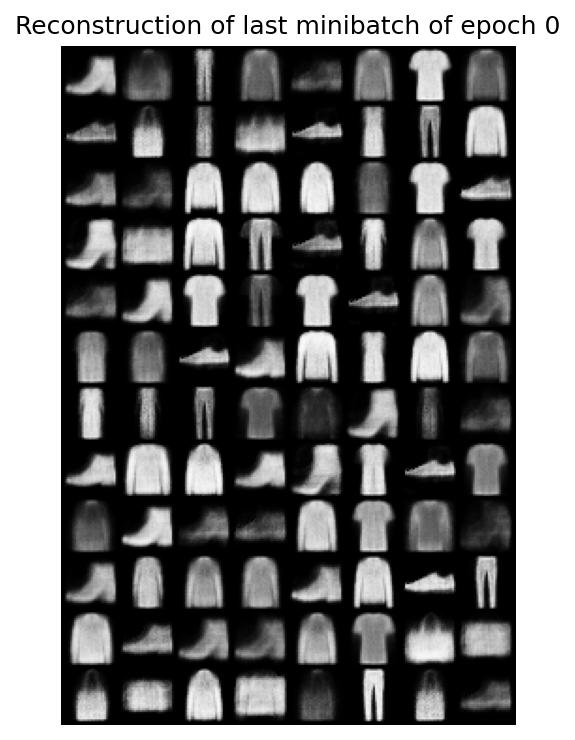

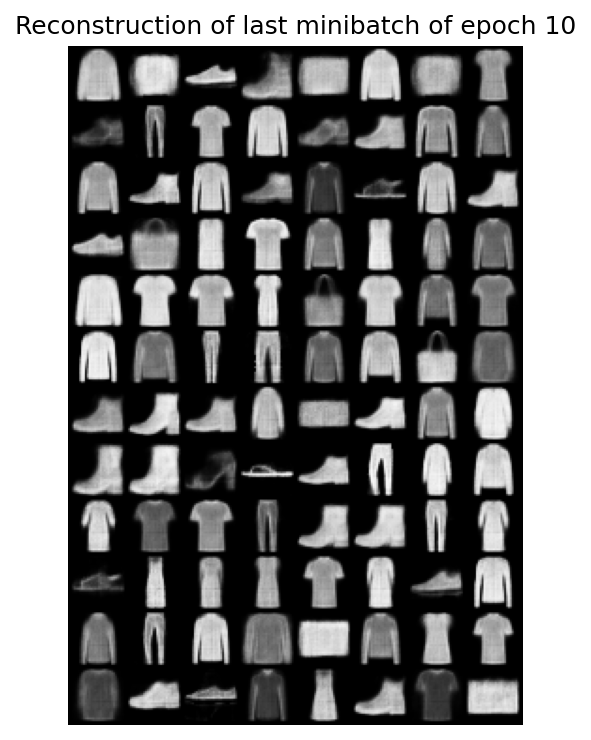

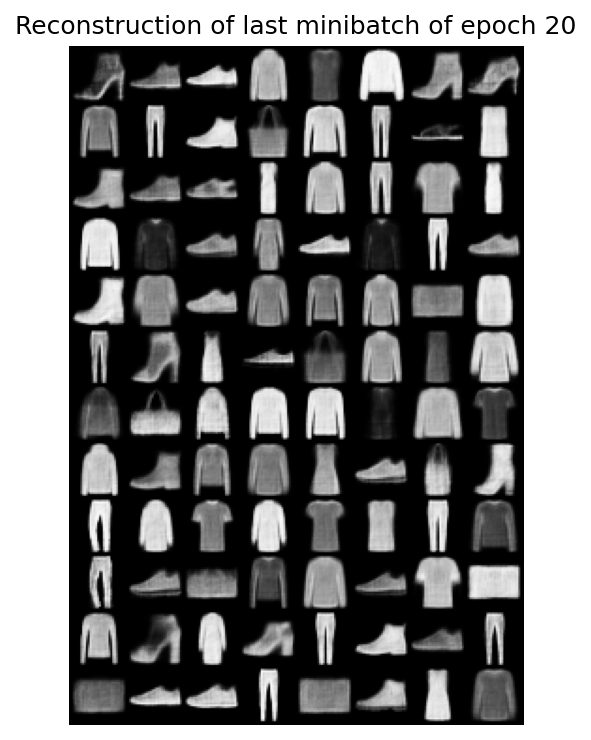

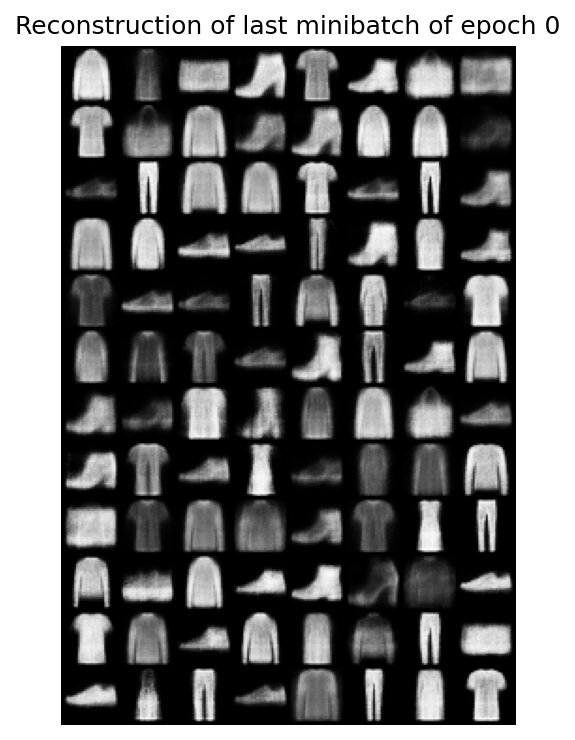

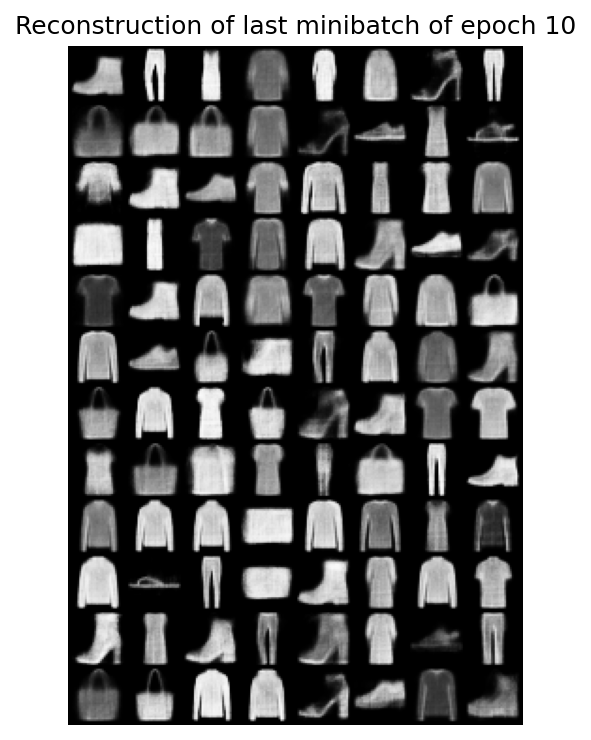

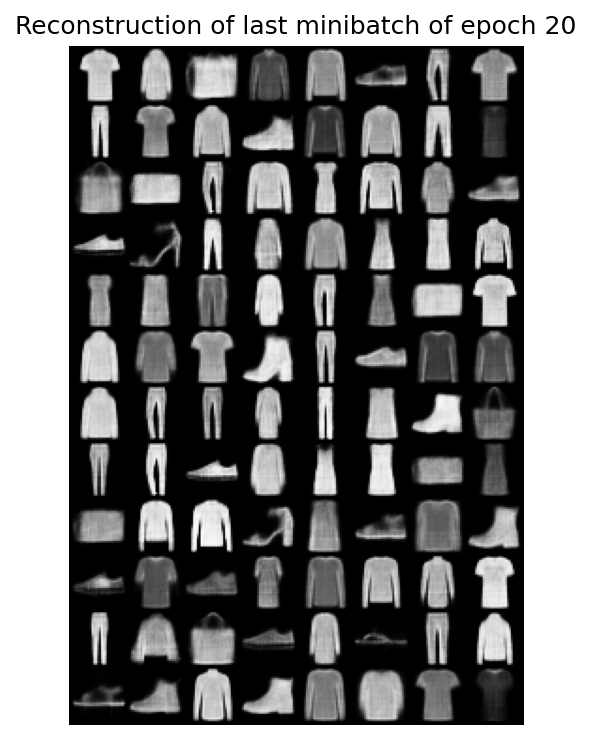

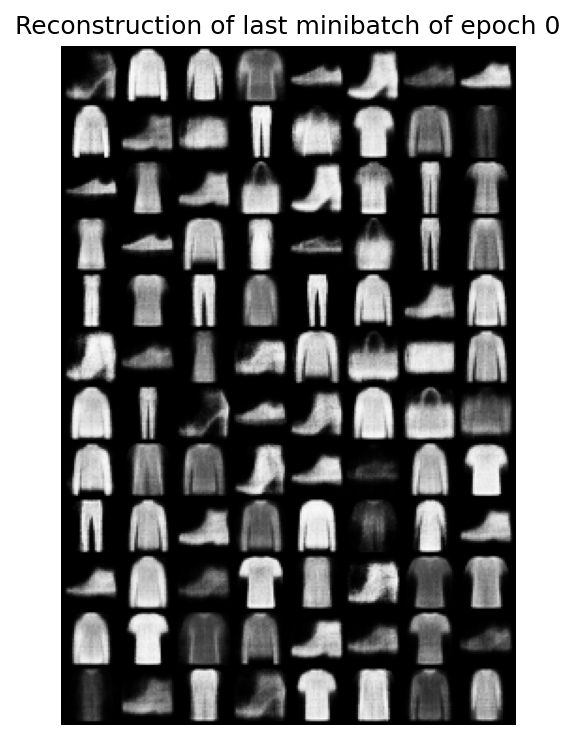

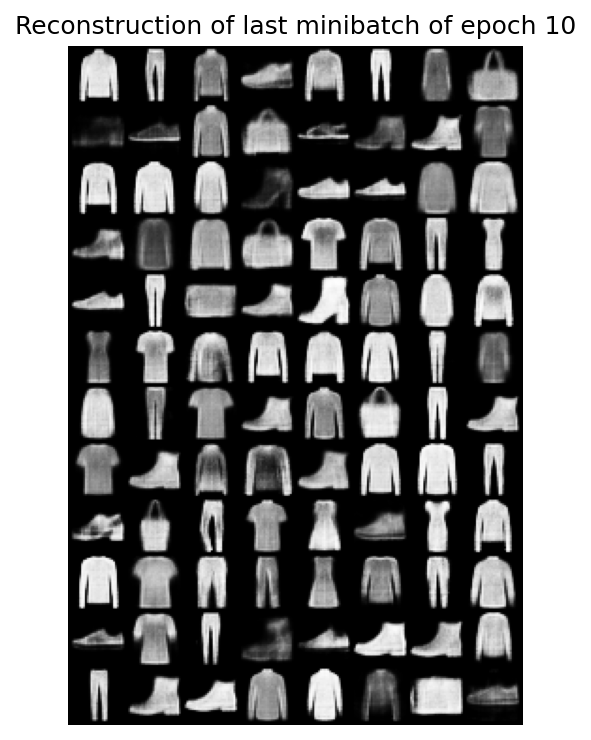

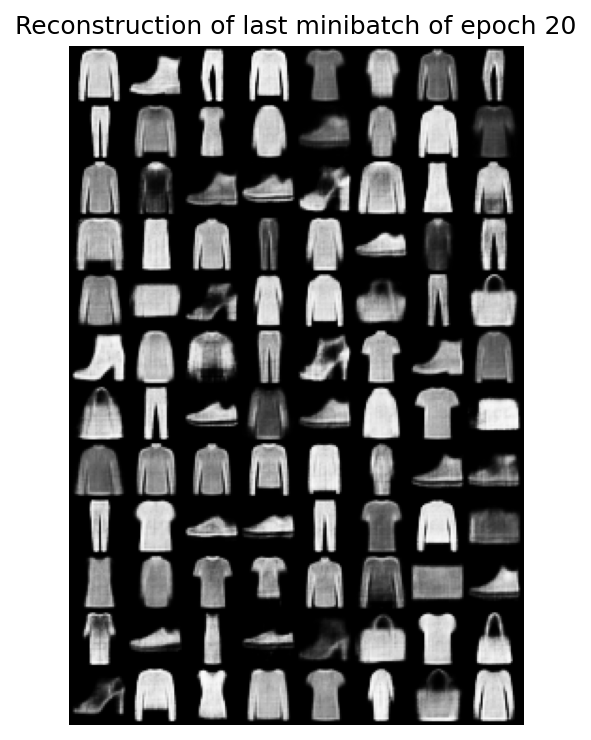

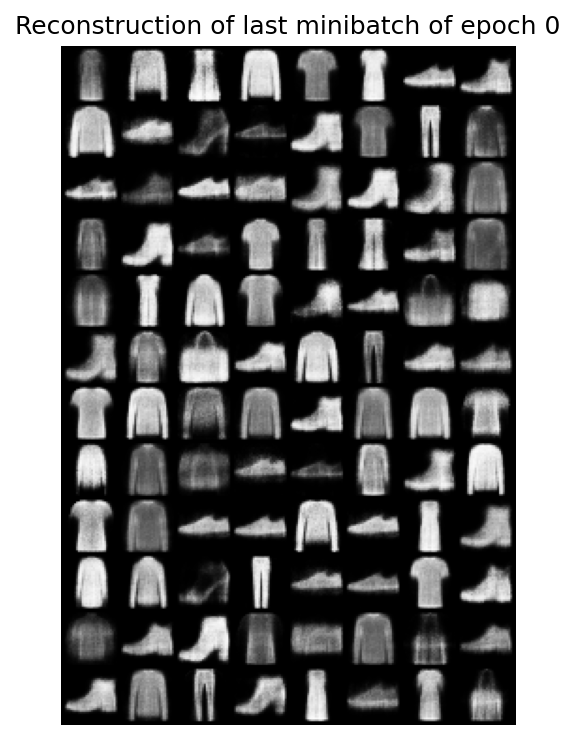

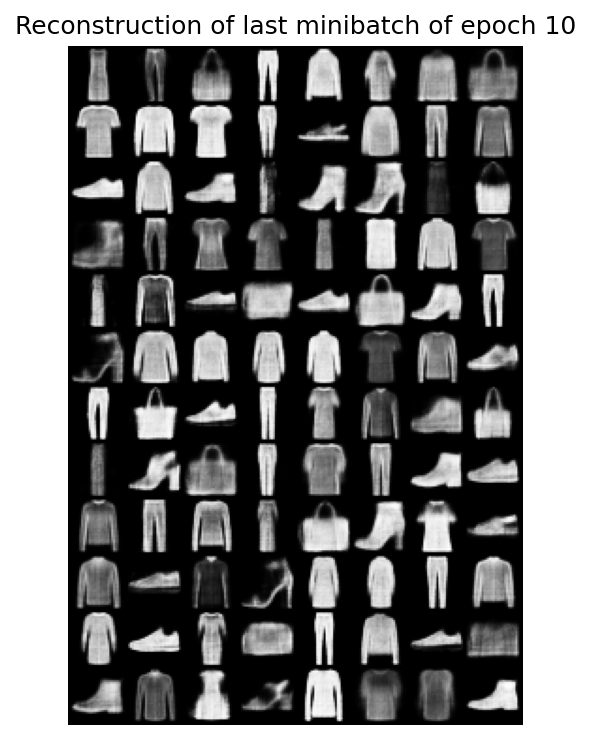

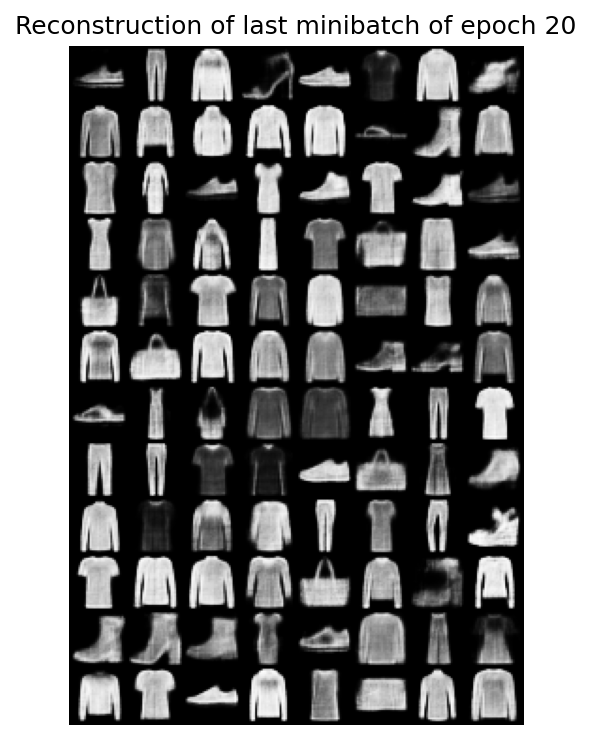

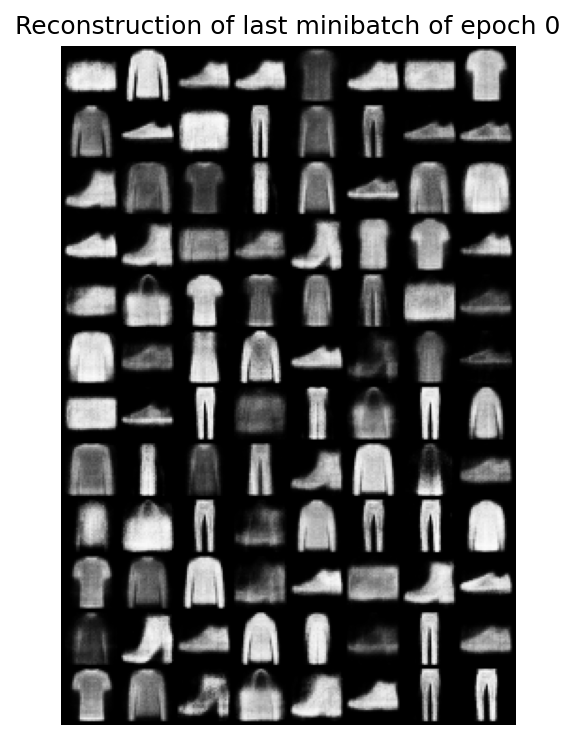

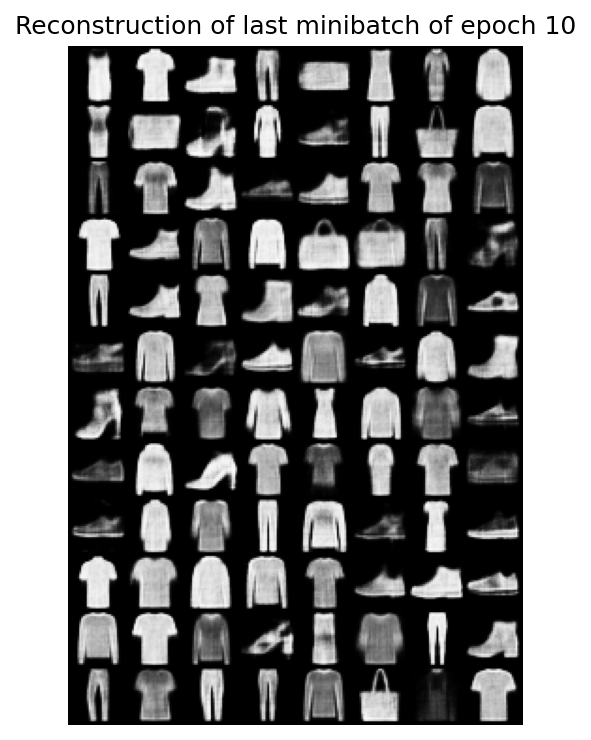

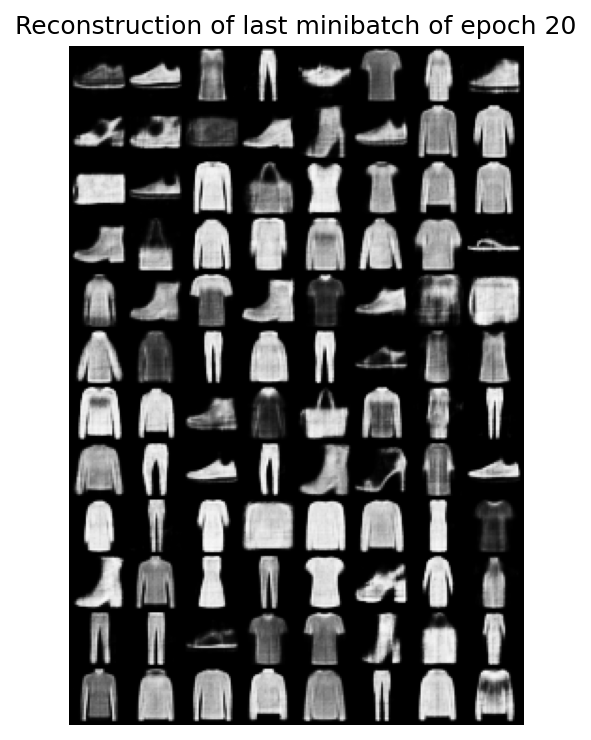

In [ ]:
# Main code

num_epochs = 21 # Run 21 epochs
learning_rate = 1e-3 #TODO: Give a suitable number 

bottleneck_layer_size = [4,8,16,32,64] #TODO: Insert a list of bottleneck layer sizes to train the network on

rec_err = [] # List of reconstruction errors to be obtained for the multiple sizes
losses = [] # List of training curves to be obtained for the multiple sizes

img_rec = full_imgs[full_label==5] #Obtains the reconstruction image batch.
# print(reconstruction_error(model,img_rec))
for size in tqdm(bottleneck_layer_size):
    print(f'\n-------TRAINING WITH HIDDEN LAYER SIZE {size}------ ')
    ##### TODO: Initialize the model with the size of the bottleneck layer, define the criterion, 
    #           the optimizer and call the train method that was defined in section 5.1. Pass the trained
    #           model and the image batch for class 0 to the reconstruction error method, and obtain the 
    #           reconstruction error, and append to the list rec_err. Append the training loss to the list, losses.

    ### Start your code here ####

    model = autoencoder(n=size) #TODO
    criterion = nn.MSELoss() #TODO
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  #TODO

    trained_model, loss_curve = train(num_epochs, dataloader, model, criterion, optimizer) #TODO
    losses.append(loss_curve)
    rec_err.append(reconstruction_error(model,img_rec))
    # err = reconstruction_error(model,img)
    ### End your code here ####



In [ ]:
print(losses)
print(rec_err)

[[tensor(0.1465, device='cuda:0', grad_fn=<DivBackward0>), tensor(0.0918, device='cuda:0', grad_fn=<DivBackward0>), tensor(0.0859, device='cuda:0', grad_fn=<DivBackward0>), tensor(0.0825, device='cuda:0', grad_fn=<DivBackward0>), tensor(0.0805, device='cuda:0', grad_fn=<DivBackward0>), tensor(0.0792, device='cuda:0', grad_fn=<DivBackward0>), tensor(0.0780, device='cuda:0', grad_fn=<DivBackward0>), tensor(0.0772, device='cuda:0', grad_fn=<DivBackward0>), tensor(0.0764, device='cuda:0', grad_fn=<DivBackward0>), tensor(0.0758, device='cuda:0', grad_fn=<DivBackward0>), tensor(0.0752, device='cuda:0', grad_fn=<DivBackward0>), tensor(0.0748, device='cuda:0', grad_fn=<DivBackward0>), tensor(0.0743, device='cuda:0', grad_fn=<DivBackward0>), tensor(0.0739, device='cuda:0', grad_fn=<DivBackward0>), tensor(0.0735, device='cuda:0', grad_fn=<DivBackward0>), tensor(0.0732, device='cuda:0', grad_fn=<DivBackward0>), tensor(0.0729, device='cuda:0', grad_fn=<DivBackward0>), tensor(0.0726, device='cuda:0

In [ ]:
for l in losses:
  for j in range(len(l)):
    l[j]=l[j].item()
for r in range(len(rec_err)):
  rec_err[r] = rec_err[r].item()
print(losses)
print(rec_err)

[[0.14649641513824463, 0.09177149832248688, 0.08589808642864227, 0.08249443769454956, 0.08050622791051865, 0.07915935665369034, 0.07804790884256363, 0.077189140021801, 0.07635656744241714, 0.0758301317691803, 0.07519800961017609, 0.07479048520326614, 0.07430240511894226, 0.07390475273132324, 0.07351619750261307, 0.07320401817560196, 0.07293928414583206, 0.0725860595703125, 0.07233340293169022, 0.07207504659891129, 0.07171227782964706], [0.12419196218252182, 0.07967482507228851, 0.07414921373128891, 0.07114183902740479, 0.06912596523761749, 0.06754446774721146, 0.06627610325813293, 0.06527741998434067, 0.06441878527402878, 0.06368649750947952, 0.06314174830913544, 0.062607541680336, 0.06214191019535065, 0.061702851206064224, 0.06129140406847, 0.06102559342980385, 0.06064600497484207, 0.060365982353687286, 0.060077965259552, 0.05981229245662689, 0.05960126966238022], [0.11969948559999466, 0.07087258249521255, 0.06306082010269165, 0.058794233947992325, 0.05609957128763199, 0.0540070049464

The code for plotting the training curves is provided below:

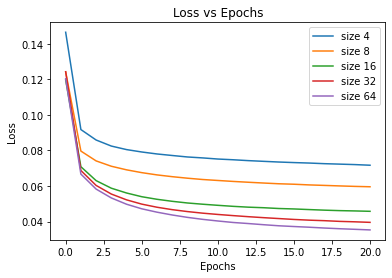

In [ ]:
# Learning curves for all bottleneck layers. DON't canage this.

epochs = np.arange(num_epochs)
plt.figure()
count = 0
for curve in losses:
    plt.plot(epochs, curve, label=f'size {str(bottleneck_layer_size[count])}')
    count += 1
plt.title("Loss vs Epochs")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

The plotting code for plotting the variation of the reconstruction error with the bottleneck layer size:

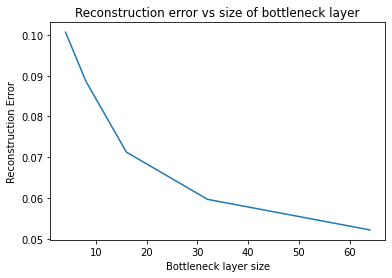

In [ ]:
# Reconstruction Error vs Hidden layer size. DON't canage this.

plt.figure()
plt.plot(bottleneck_layer_size,rec_err)
plt.title("Reconstruction error vs size of bottleneck layer")
plt.xlabel("Bottleneck layer size")
plt.ylabel("Reconstruction Error")
plt.show()

### Latex question 2.3:

1) In this section, you will extend your code in Part 1 to a variable size bottleneck layer. Use your existing code in Part 1 and run the same for the bottleneck layer sizes $[4,8,16,32,64]$. Record the training curves and the final reconstruction errors for the input images belonging to the class label 0 for each of the sizes. Report the combined training curves (mean epoch loss vs epochs) for all the configurations. Also report the reconstructed images for Epoch 20 for each of the configurations.

2) Plot the mean reconstruction error of the 6 different trained models when the input images belong to the class label 5, with respect to the size of the bottleneck layer. What are you observing? How does what you see relate to PCA? What does this tell you about how you can potentially work with a high-dimensional data-space?

# Turning it in

Submit colab link to gradescope (make sure it's accessible to everyone)